In [51]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [52]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!
df = pd.read_csv(r'C:\Users\pasin\OneDrive\Desktop\ALHW\credit_risk_classification\credit_risk\lending_data.csv')


# Review the DataFrame
# YOUR CODE HERE!
df.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [53]:
# Separate the data into labels and features

# Separate the y variable, the labels
# YOUR CODE HERE!]
y = df['loan_status']


# Separate the X variable, the features
# YOUR CODE HERE!
X = df.drop(columns='loan_status')


In [54]:
# Review the y variable Series
# YOUR CODE HERE!
y.head()


0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [55]:
# Review the X variable DataFrame
# YOUR CODE HERE!
X.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [56]:
# Check the balance of our target values
# YOUR CODE HERE!
target_value = df['loan_status'].value_counts()
print(target_value)

loan_status
0    75036
1     2500
Name: count, dtype: int64


### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [57]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
# YOUR CODE HERE!
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [58]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
classifier = LogisticRegression(random_state=1)

# Fit the model using training data
# YOUR CODE HERE!
classifier.fit(X_train, y_train)


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [59]:
# Make a prediction using the testing data
# YOUR CODE HERE!
predictions = classifier.predict(X_test)


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [60]:
# Print the balanced_accuracy score of the model
# YOUR CODE HERE!
balanced_accuracy_score(y_test, predictions)


0.9520479254722232

In [61]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
confusion_matrix(y_test, predictions)


array([[18663,   102],
       [   56,   563]], dtype=int64)

In [62]:
# Print the classification report for the model
# YOUR CODE HERE!
target_names = ["Healthy Loan", "High-risk Loan"]
print(classification_report(y_test, predictions, target_names=target_names))

                precision    recall  f1-score   support

  Healthy Loan       1.00      0.99      1.00     18765
High-risk Loan       0.85      0.91      0.88       619

      accuracy                           0.99     19384
     macro avg       0.92      0.95      0.94     19384
  weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model is extremely accurate in predictiing the "healthy" loan labels with a precision of 1.00 and recall of just 0.99. The model does a decent job of predicting "hish-risk" loan labels with a precision of 0.85 but a recall of 0.91. Overall I would conclude that this is a reasonanble accurate model.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [63]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
# YOUR CODE HERE!
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


In [69]:
# Count the distinct values of the resampled labels data
# YOUR CODE HERE!
label_counts = y_resampled.value_counts()
print(label_counts)

loan_status
0    56271
1    56271
Name: count, dtype: int64


### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [70]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
# YOUR CODE HERE!
logistic_regression_model.fit(X_resampled, y_resampled)

# Make a prediction using the testing data
# YOUR CODE HERE!
predictions = logistic_regression_model.predict(X_test)


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [74]:
# Print the balanced_accuracy score of the model 
# YOUR CODE HERE!

print("Balanced Accuracy Score:", balanced_accuracy)

Balanced Accuracy Score: 0.9936781215845847


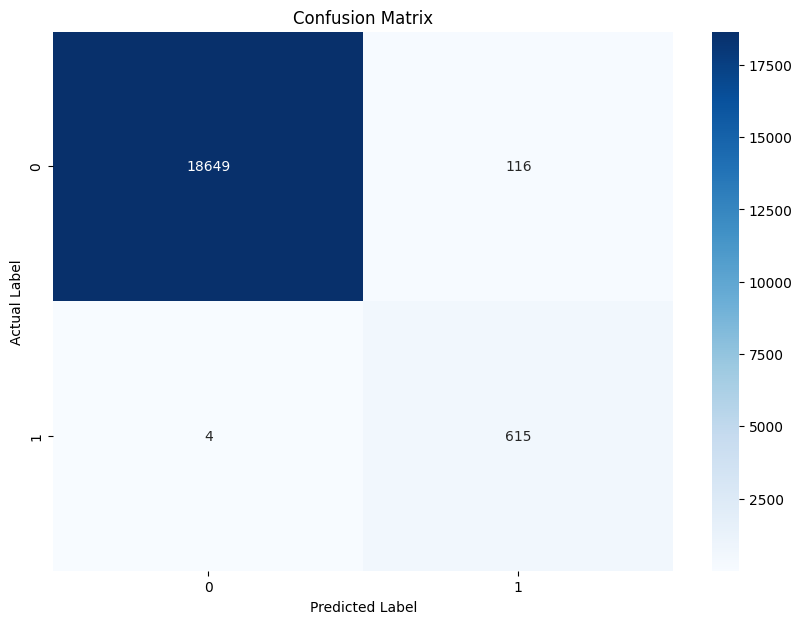

In [77]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Create the confusion matrix

cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [79]:
# Print the classification report for the model
# YOUR CODE HERE!
# Generate the classification report
report = classification_report(y_test, predictions)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistics regression model should accurately identify high-risk loans without misclassifying too many healthy loans as high-risk and vice versa. 